In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

cifar10 = tf.keras.datasets.cifar10

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


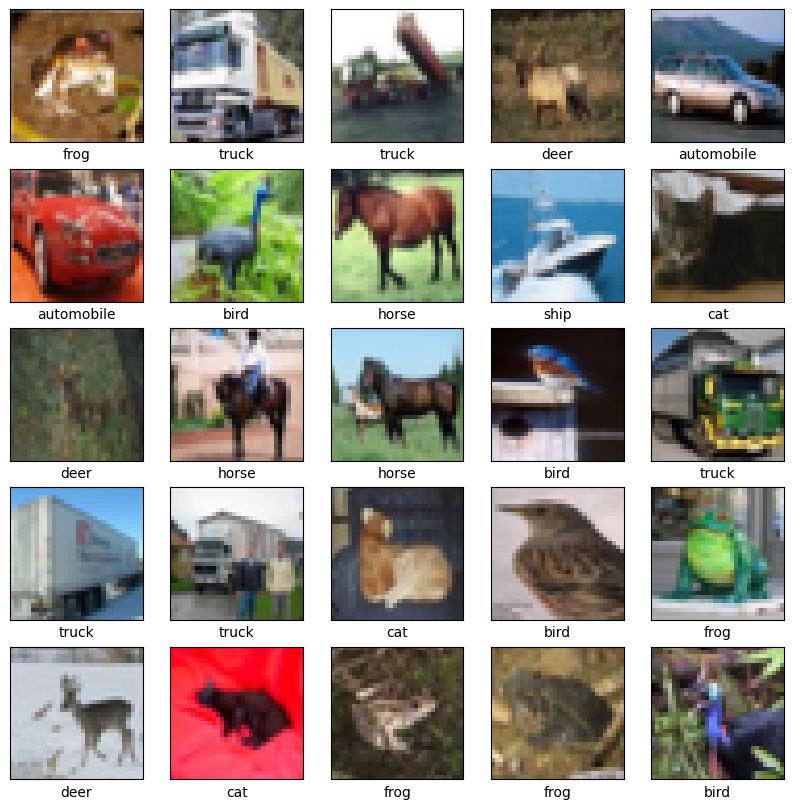

In [11]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# Label and plot images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [12]:
#Define the model to be used for the SVC
model = SVC(probability = False, kernel = 'linear', C = 0.1)

In [13]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
# Preprocessing: Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Flatten the labels
#y_train = y_train.ravel()
#y_test = y_test.ravel()

# Normalize pixel values to between 0 and 1
#x_train = x_train.astype('float32') / 255
#x_test = x_test.astype('float32') / 255

# Lower the size of the dataset to prevent long training time
# Define the size of the subset
subset_size = 10000  # Adjust this number according to your needs

# Randomly select indices for the subset
subset_indices = np.random.choice(len(x_train), subset_size, replace=False)

# Create the subset
x_train_subset = x_train[subset_indices]
y_train_subset = y_train[subset_indices]



In [15]:
x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [16]:
model.fit(x_train_subset, y_train_subset)

c:\Users\myurk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, kernel='linear')

In [17]:
# Predict the labels for test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.372
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.49      0.44      1000
           1       0.44      0.43      0.44      1000
           2       0.26      0.27      0.26      1000
           3       0.26      0.27      0.26      1000
           4       0.31      0.30      0.30      1000
           5       0.30      0.32      0.31      1000
           6       0.42      0.41      0.42      1000
           7       0.46      0.35      0.40      1000
           8       0.48      0.48      0.48      1000
           9       0.44      0.40      0.42      1000

    accuracy                           0.37     10000
   macro avg       0.38      0.37      0.37     10000
weighted avg       0.38      0.37      0.37     10000



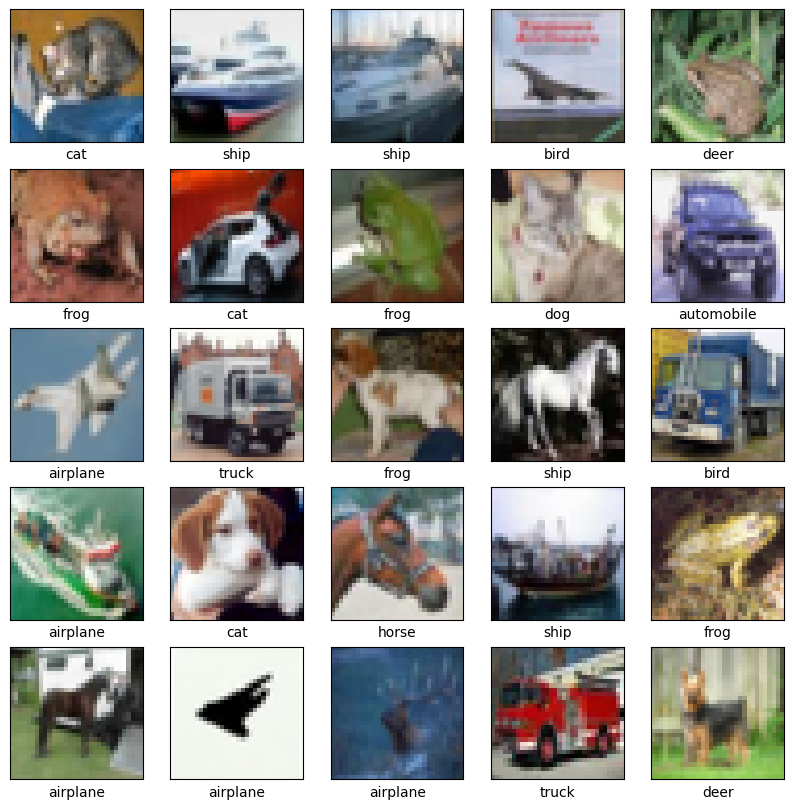

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(32, 32, 3))  # Reshape images to (32, 32, 3)
    plt.xlabel(class_names[y_pred[i]])  # Use predicted labels
plt.show()
